# “Predictive Analytics for Banking: Addressing Default Risks and Enhancing Customer Insights”

## Introduction  
This project focuses on analyzing credit card customer data to gain insights into repayment behaviors, segment customers based on risk profiles, and predict future trends. By leveraging advanced machine learning models and statistical techniques, the study addresses critical problem statements, including default risk prediction, repayment behavior analysis, customer segmentation, bill forecasting, and gender-specific risk factors. The outcomes provide actionable insights for financial institutions to enhance risk management strategies and customer engagement.

## Data Preprocessing and EDA


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
df = pd.read_csv("default of credit card clients.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [42]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [43]:
df.tail(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29990,29991,140000,1,2,1,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29991,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29992,29993,10000,1,3,1,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29994,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [44]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric columns
scaler = StandardScaler()
numeric_cols = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols]

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [46]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for normalization
num_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
scaler = MinMaxScaler()

df[num_features] = scaler.fit_transform(df[num_features])
df[num_features]

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,0.010101,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979
1,0.111111,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485
2,0.080808,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928
3,0.040404,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685
4,0.040404,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681
...,...,...,...,...,...,...,...
29995,0.212121,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259
29996,0.141414,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979
29997,0.020202,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854
29998,0.070707,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591


In [47]:
# Check data types of each column
print(df.dtypes)

# Convert data types if necessary
df['AGE'] = df['AGE'].astype(float)
df['LIMIT_BAL'] = df['LIMIT_BAL'].astype(float)


ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month      int64
dtype: object


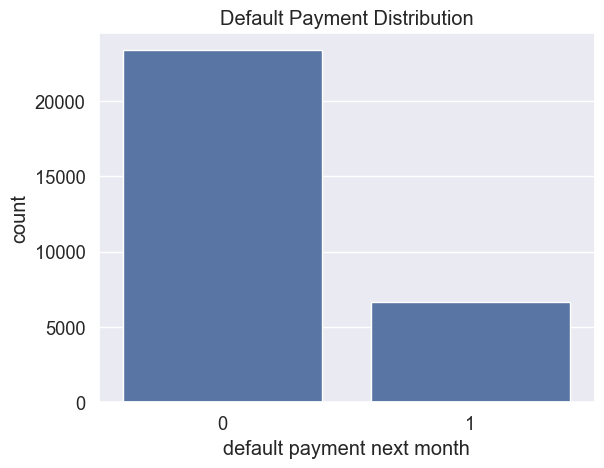

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot target distribution
sns.countplot(x='default payment next month', data=df)
plt.title('Default Payment Distribution')
plt.show()


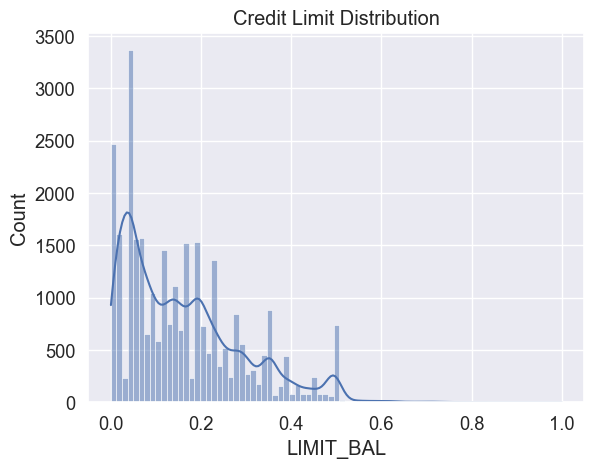

In [49]:
# Distribution of LIMIT_BAL
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title('Credit Limit Distribution')
plt.show()


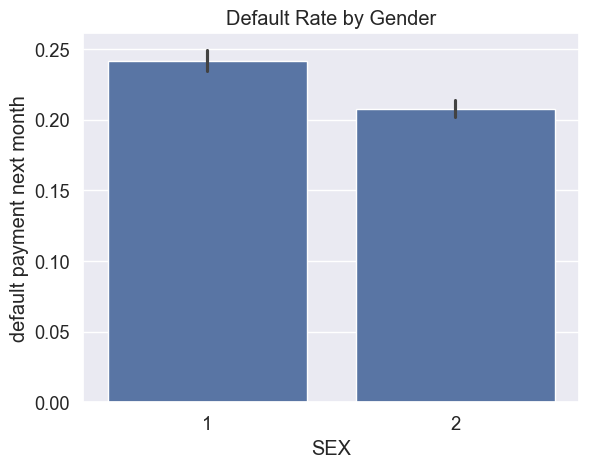

In [50]:
# Default rate by SEX
sns.barplot(x='SEX', y='default payment next month', data=df)
plt.title('Default Rate by Gender')
plt.show()


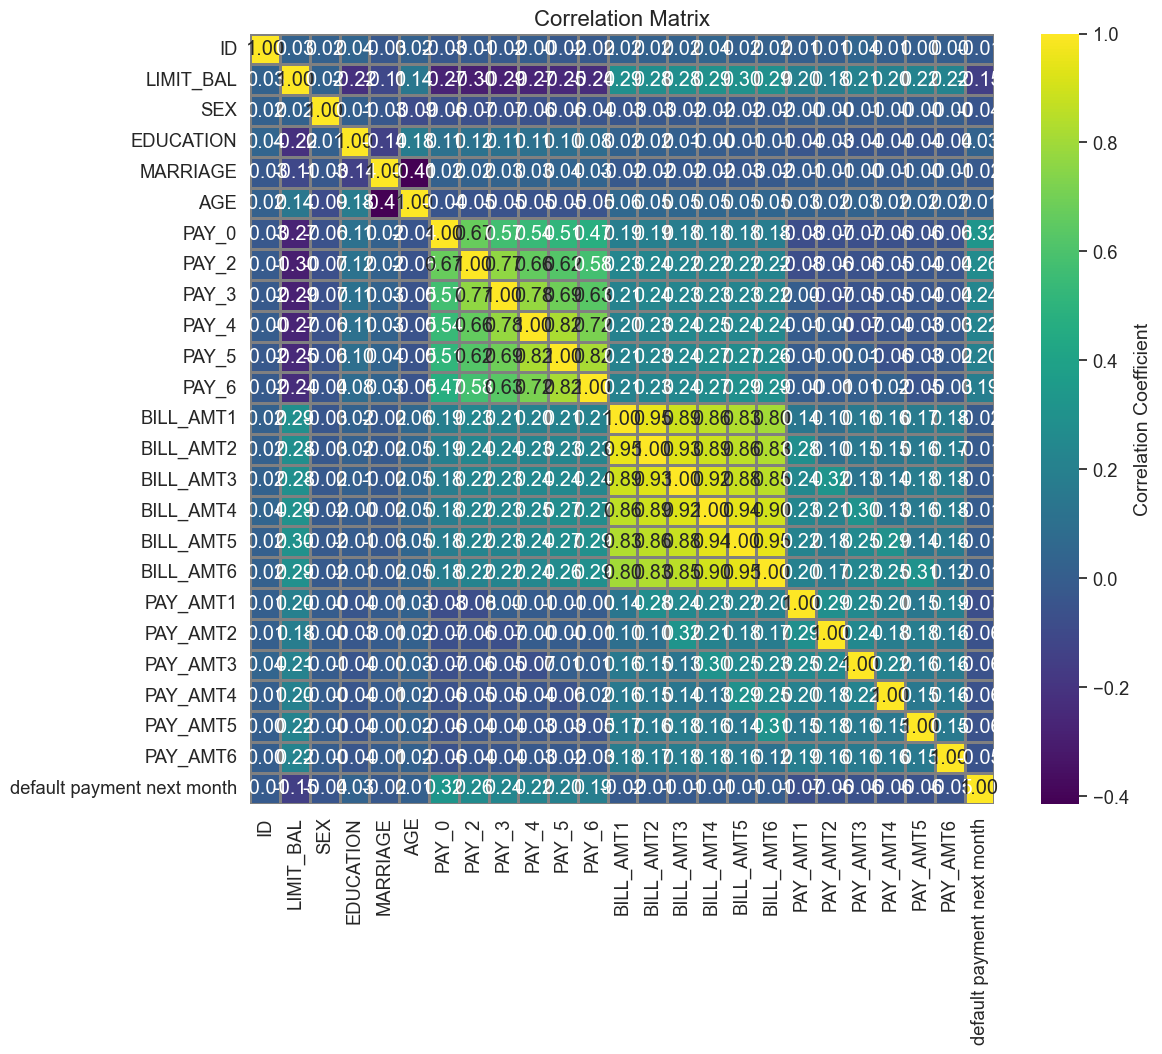

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation = df.corr()

# Create the heatmap with improved visualization
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)  # Larger text for readability
plt.title('Correlation Matrix', size=16)

# Plot the heatmap with appropriate annotations and aesthetics
heatmap = sns.heatmap(correlation, annot=True, fmt=".2f", cmap="viridis", linewidths=1, linecolor="gray")

# Improve colorbar readability
colorbar = heatmap.collections[0].colorbar
colorbar.set_label("Correlation Coefficient", fontsize=14)

# Show the plot
plt.show()


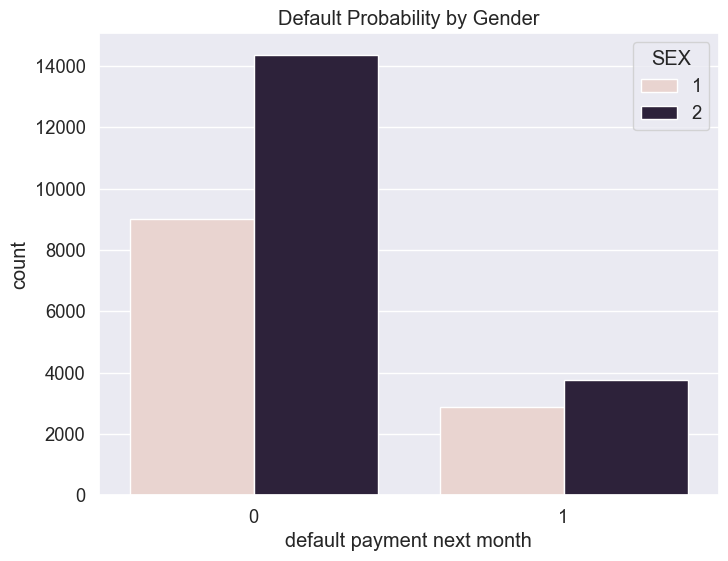

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='default payment next month', hue='SEX', data=df)
plt.title('Default Probability by Gender')
plt.show()

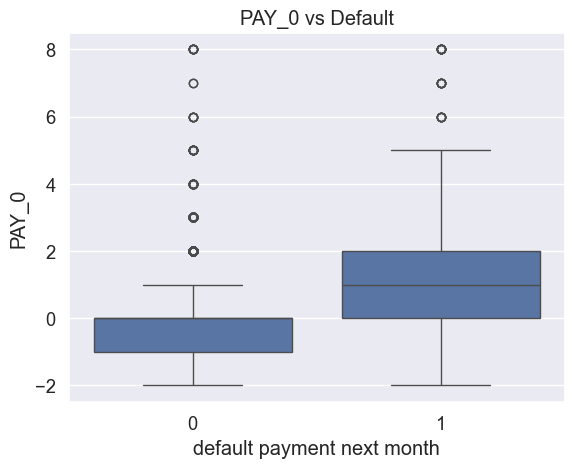

In [53]:
# Box plot for PAY_0 vs default
sns.boxplot(x='default payment next month', y='PAY_0', data=df)
plt.title('PAY_0 vs Default')
plt.show()

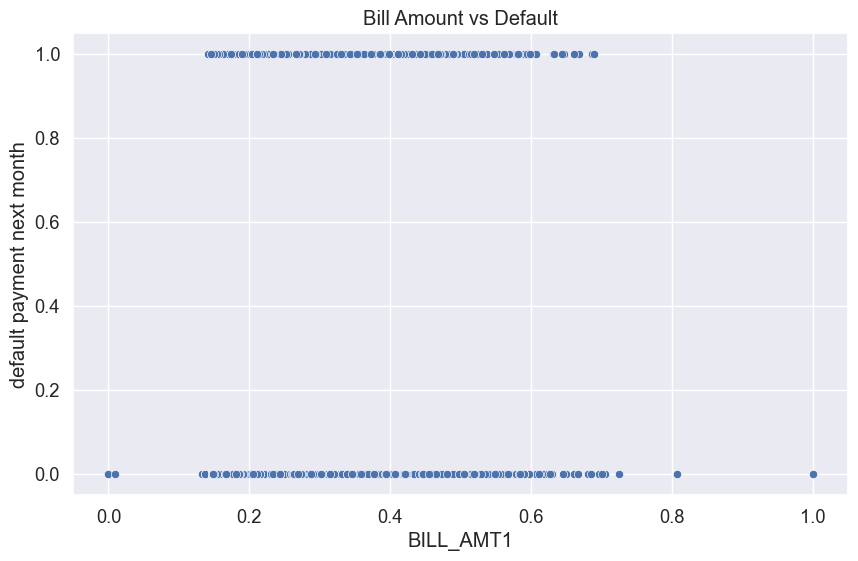

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BILL_AMT1', y='default payment next month', data=df)
plt.title('Bill Amount vs Default')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\584959768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df, palette='Set2')


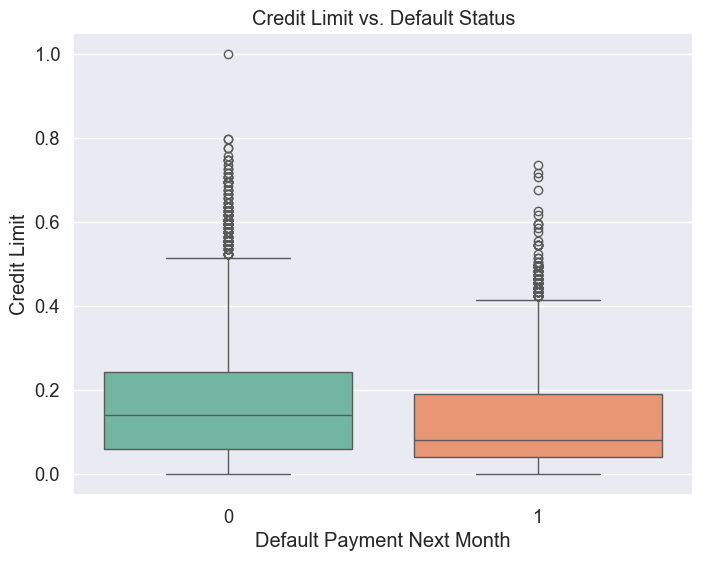

In [55]:
# Credit Limit vs. Default
plt.figure(figsize=(8, 6))
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df, palette='Set2')
plt.title('Credit Limit vs. Default Status')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Credit Limit')
plt.show()

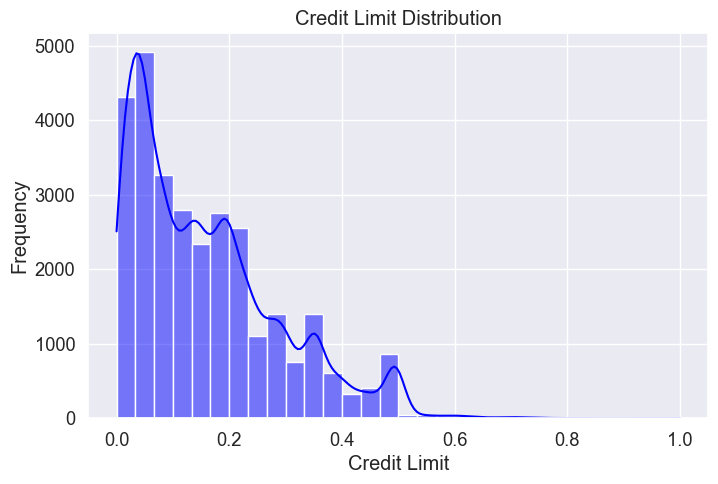

In [56]:
# Credit Limit Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['LIMIT_BAL'], kde=True, color='blue', bins=30)
plt.title('Credit Limit Distribution')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

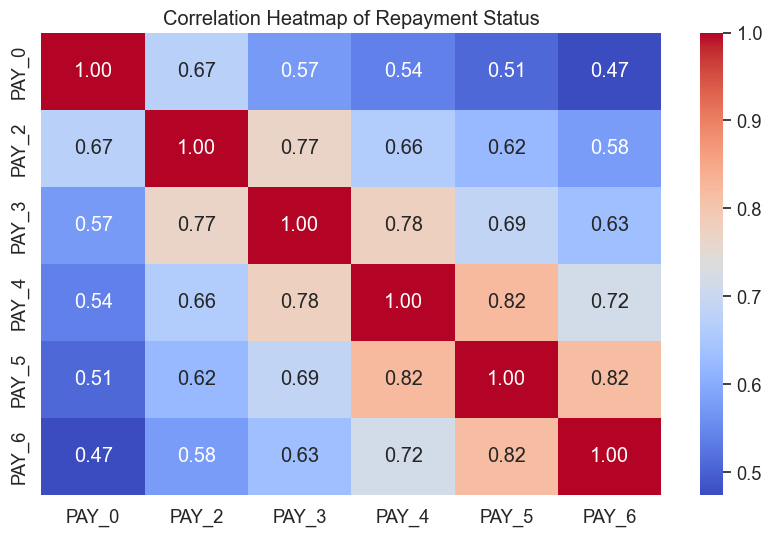

In [57]:
# Repayment Status Trends (Heatmap)
repayment_status = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
plt.figure(figsize=(10, 6))
sns.heatmap(repayment_status.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Repayment Status')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\1563526479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='default payment next month', y='AGE', data=df, palette='muted')


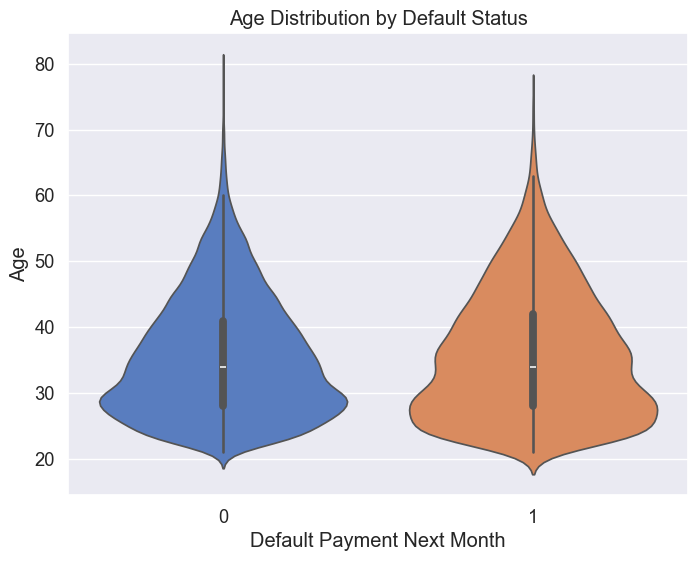

In [58]:
# Age vs. Default
plt.figure(figsize=(8, 6))
sns.violinplot(x='default payment next month', y='AGE', data=df, palette='muted')
plt.title('Age Distribution by Default Status')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Age')
plt.show()

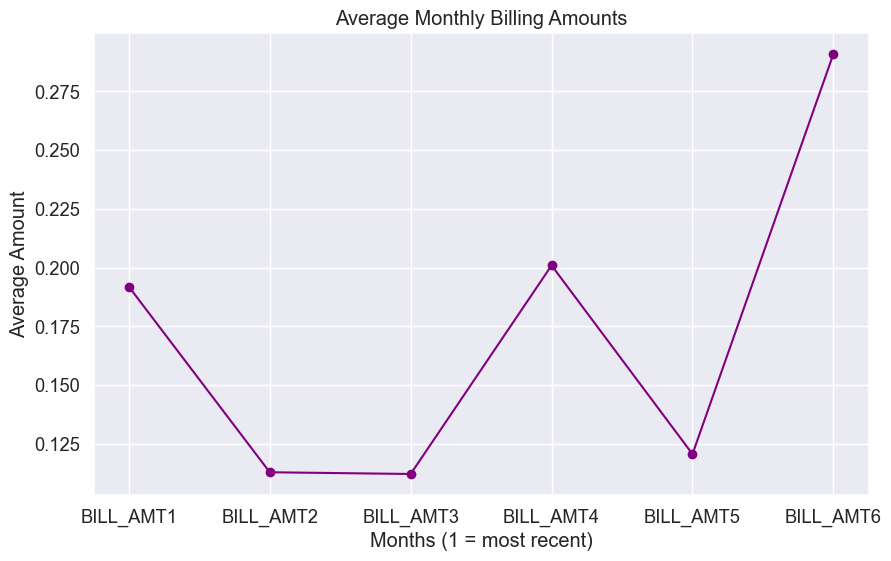

In [59]:
# Monthly Billing and Payment Trends
months = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df[months].mean().plot(kind='line', figsize=(10, 6), marker='o', color='purple')
plt.title('Average Monthly Billing Amounts')
plt.xlabel('Months (1 = most recent)')
plt.ylabel('Average Amount')
plt.show()

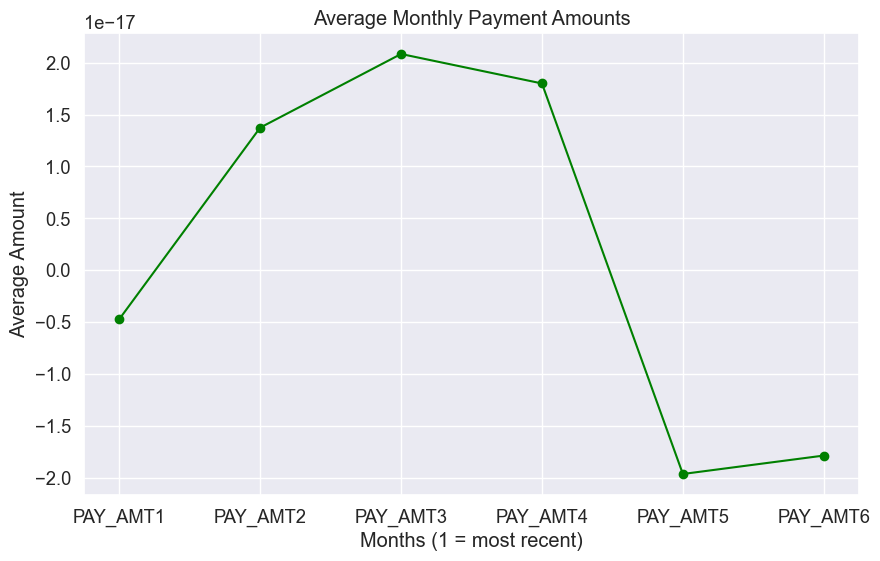

In [60]:
payments = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[payments].mean().plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title('Average Monthly Payment Amounts')
plt.xlabel('Months (1 = most recent)')
plt.ylabel('Average Amount')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\1719797254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEX', data=df, palette='Set2')


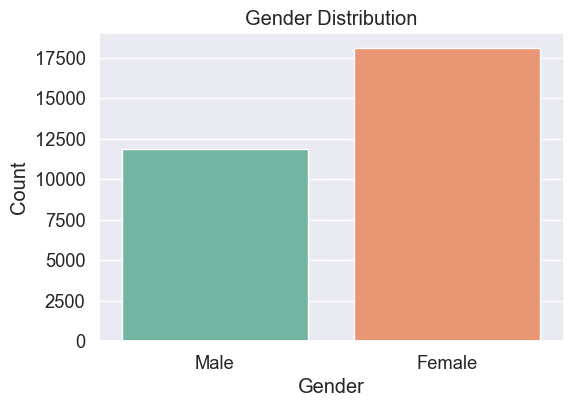

In [61]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\4184565303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EDUCATION', data=df, palette='Set3')


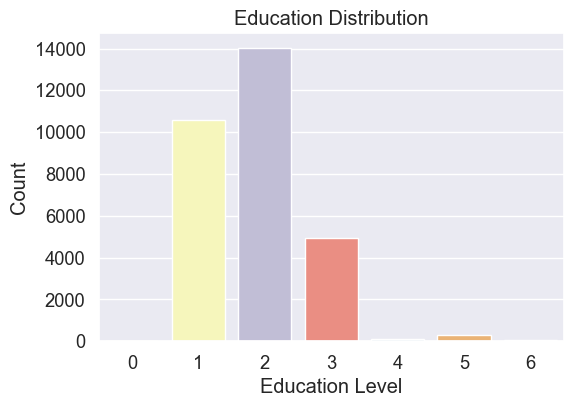

In [62]:
# Education Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='EDUCATION', data=df, palette='Set3')
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\4261282087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MARRIAGE', data=df, palette='Set1')


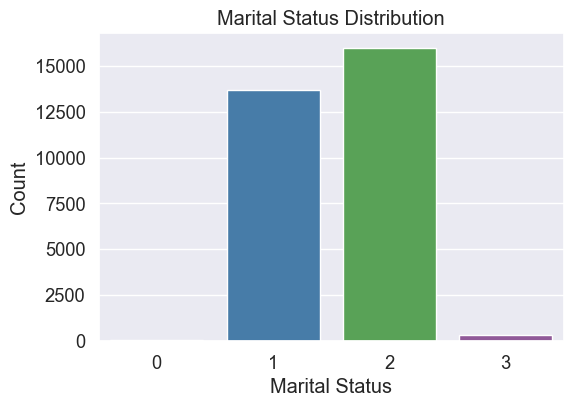

In [63]:
# Marital Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='MARRIAGE', data=df, palette='Set1')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

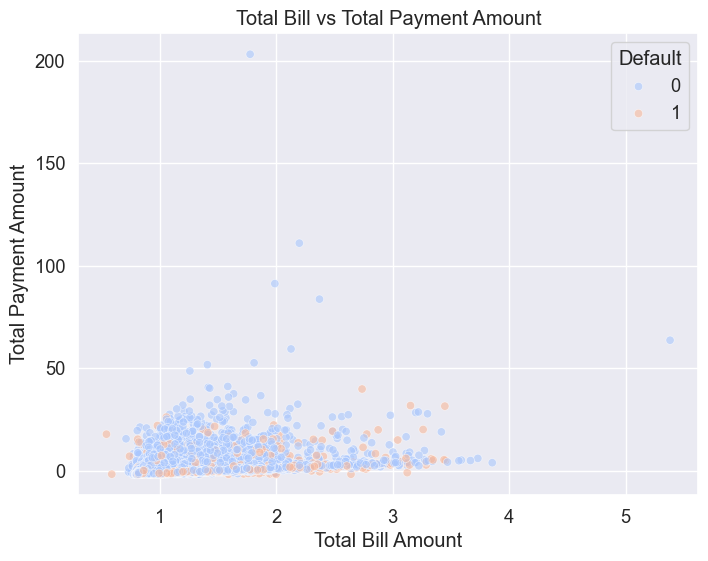

In [64]:
# Total Bill Amount vs Total Payment Amount
df['Total_Bill'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
df['Total_Payment'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Bill', y='Total_Payment', hue='default payment next month', data=df, palette='coolwarm', alpha=0.6)
plt.title('Total Bill vs Total Payment Amount')
plt.xlabel('Total Bill Amount')
plt.ylabel('Total Payment Amount')
plt.legend(title='Default')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\1301340327.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Credit Range', y='default payment next month', data=df, palette='coolwarm', ci=None)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\1301340327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Credit Range', y='default payment next month', data=df, palette='coolwarm', ci=None)


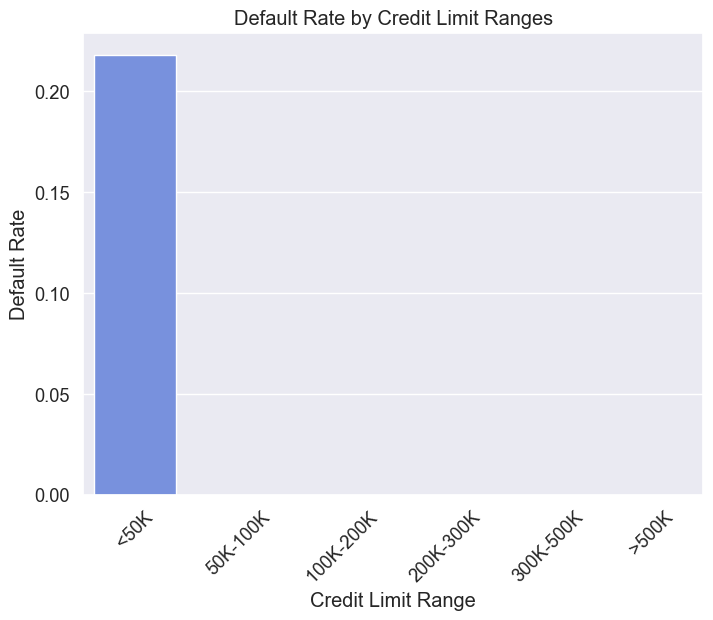

In [65]:
# Default Rate by Credit Limit Ranges
df['Credit Range'] = pd.cut(df['LIMIT_BAL'], bins=[0, 50000, 100000, 200000, 300000, 500000, 1000000],
                              labels=['<50K', '50K-100K', '100K-200K', '200K-300K', '300K-500K', '>500K'])
plt.figure(figsize=(8, 6))
sns.barplot(x='Credit Range', y='default payment next month', data=df, palette='coolwarm', ci=None)
plt.title('Default Rate by Credit Limit Ranges')
plt.xlabel('Credit Limit Range')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

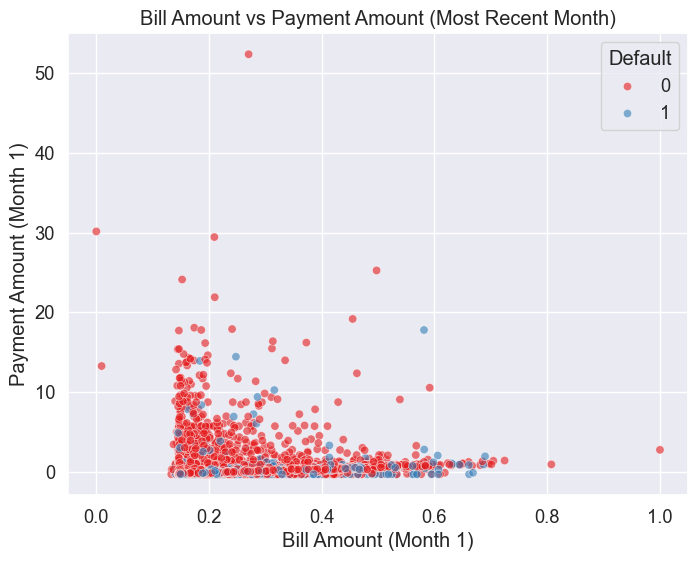

In [66]:
# Relationship Between Bill Amount and Payment Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BILL_AMT1', y='PAY_AMT1', hue='default payment next month', data=df, palette='Set1', alpha=0.6)
plt.title('Bill Amount vs Payment Amount (Most Recent Month)')
plt.xlabel('Bill Amount (Month 1)')
plt.ylabel('Payment Amount (Month 1)')
plt.legend(title='Default')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\2623338511.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='EDUCATION', y='default payment next month', data=df, palette='magma', ci=None)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\2623338511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EDUCATION', y='default payment next month', data=df, palette='magma', ci=None)


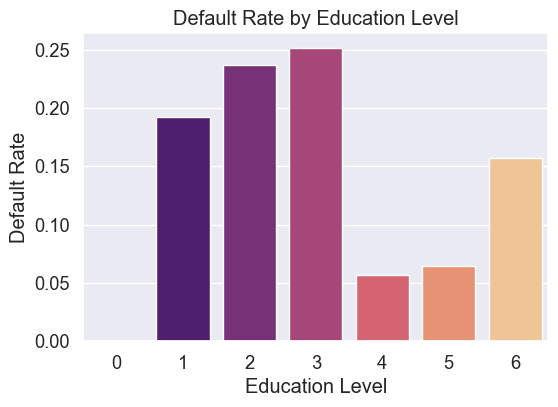

In [67]:
# Default Rate by Education Level
plt.figure(figsize=(6, 4))
sns.barplot(x='EDUCATION', y='default payment next month', data=df, palette='magma', ci=None)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\3655811665.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SEX', y='default payment next month', data=df, palette='coolwarm', ci=None)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\3655811665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SEX', y='default payment next month', data=df, palette='coolwarm', ci=None)


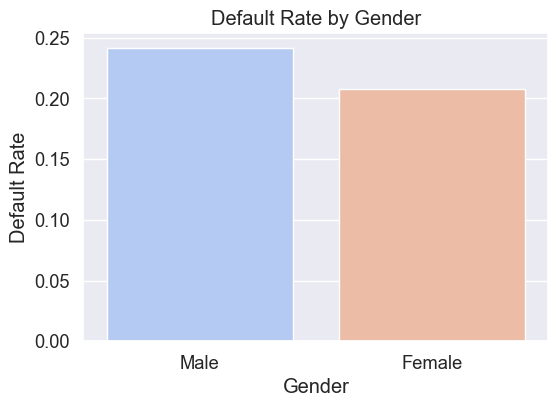

In [68]:
# Default Rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='SEX', y='default payment next month', data=df, palette='coolwarm', ci=None)
plt.title('Default Rate by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Default Rate')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\217388749.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default = df.groupby('Age Group')['default payment next month'].mean().reset_index()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\217388749.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='default payment next month', data=age_default, palette='Blues_d')


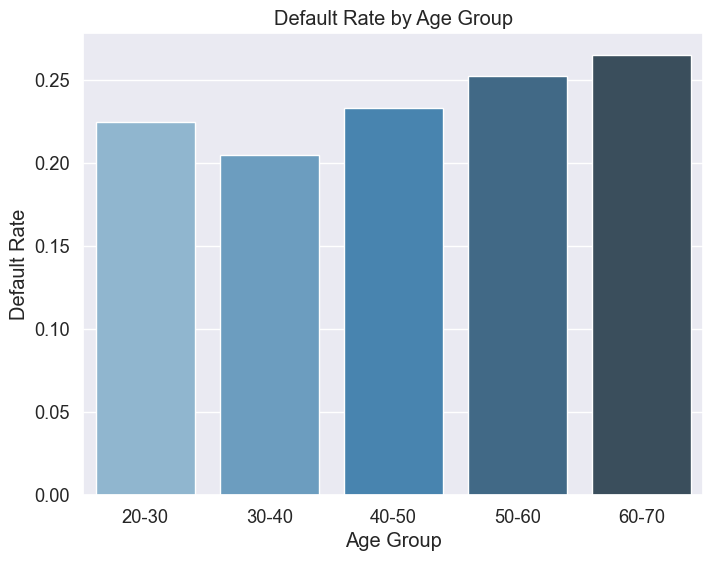

In [69]:
# Age Groups and Default Rate
df['Age Group'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 70], 
                           labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

# Default Rate by Age Group
age_default = df.groupby('Age Group')['default payment next month'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Group', y='default payment next month', data=age_default, palette='Blues_d')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.show()


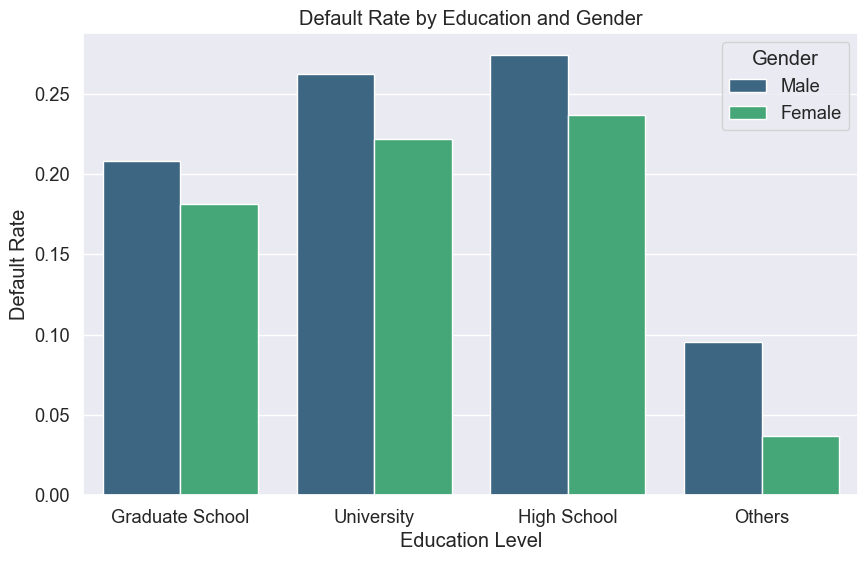

In [70]:
# Default Rate by Education and Gender
education_gender_default = df.groupby(['EDUCATION', 'SEX'])['default payment next month'].mean().reset_index()

# Replace numeric values with meaningful labels
education_labels = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'}
gender_labels = {1: 'Male', 2: 'Female'}

education_gender_default['EDUCATION'] = education_gender_default['EDUCATION'].map(education_labels)
education_gender_default['SEX'] = education_gender_default['SEX'].map(gender_labels)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='EDUCATION', 
    y='default payment next month', 
    hue='SEX', 
    data=education_gender_default, 
    palette='viridis'
)
plt.title('Default Rate by Education and Gender')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')
plt.legend(title='Gender')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15212\3269931090.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marriage_age_default = df.groupby(['MARRIAGE', 'Age Group'])['default payment next month'].mean().reset_index()


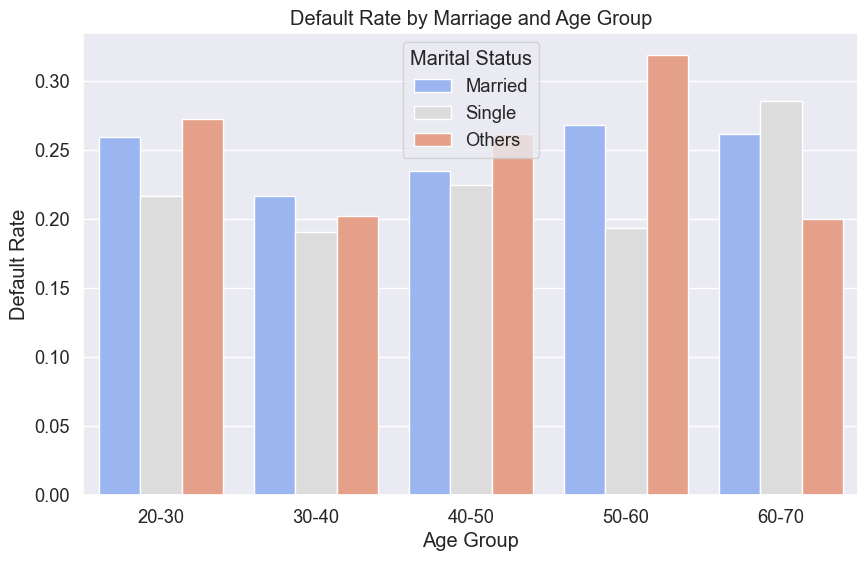

In [71]:
# Create Age Groups
df['Age Group'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 70], 
                           labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

# Default Rate by Marriage and Age Group
marriage_age_default = df.groupby(['MARRIAGE', 'Age Group'])['default payment next month'].mean().reset_index()

# Replace numeric values with meaningful labels
marriage_labels = {1: 'Married', 2: 'Single', 3: 'Others'}
marriage_age_default['MARRIAGE'] = marriage_age_default['MARRIAGE'].map(marriage_labels)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Age Group', 
    y='default payment next month', 
    hue='MARRIAGE', 
    data=marriage_age_default, 
    palette='coolwarm'
)
plt.title('Default Rate by Marriage and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.legend(title='Marital Status')
plt.show()


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [73]:
# Drop unnecessary columns if needed (e.g., ID if present)
if 'ID' in df.columns:
    df.drop(['ID'], axis=1, inplace=True)

In [75]:
# Rename the target variable for clarity
df.rename(columns={"default payment next month": "default"}, inplace=True)

In [76]:
# Create feature set (X) and target (y)
X = df.drop(['default'], axis=1)
y = df['default']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [80]:
print(df.dtypes)
print(df.head())

LIMIT_BAL         float64
SEX                 int64
EDUCATION           int64
MARRIAGE            int64
AGE               float64
PAY_0               int64
PAY_2               int64
PAY_3               int64
PAY_4               int64
PAY_5               int64
PAY_6               int64
BILL_AMT1         float64
BILL_AMT2         float64
BILL_AMT3         float64
BILL_AMT4         float64
BILL_AMT5         float64
BILL_AMT6         float64
PAY_AMT1          float64
PAY_AMT2          float64
PAY_AMT3          float64
PAY_AMT4          float64
PAY_AMT5          float64
PAY_AMT6          float64
default             int64
Total_Bill        float64
Total_Payment     float64
Credit Range     category
Age Group        category
dtype: object
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   0.010101    2          2         1  24.0      2      2     -1     -1   
1   0.111111    2          2         2  26.0     -1      2      0      0   
2   0.080808    2          2  